In [310]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import numpy as np
from scipy.stats import linregress
import datetime   

In [311]:
mypath='C:/Users/sara/Documents/5anno/TESI/tracciati/ConversioneExcel'    
df = pd.read_csv( mypath+'/AE_12.06.1823.30.02512.csv', names=['time', 'spO2'])
spo2_array=df['spO2']
time_array=df['time']

In [312]:
def remove_days(time):
    if(time>86400):
        time=time-86400
    return time

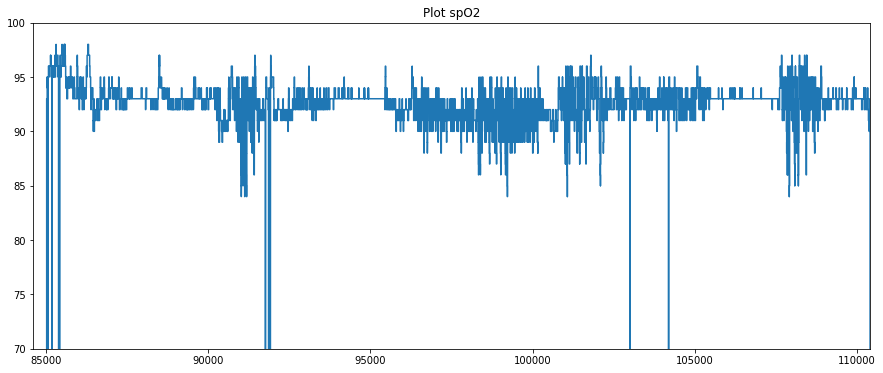

In [313]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2')
plt.axis([time_array[0],time_array[len(time_array)-1],70,100])
plt.step(time_array,spo2_array)

### Preprocessing

In [314]:
#Outlier noise
str(datetime.timedelta(seconds=time_array[len(time_array)-1]))
index=df[df.spO2 == 0].index
#str(datetime.timedelta(seconds=time_array[58759]))
df=df.drop(df.index[index])  
df_outlier=pd.DataFrame()
df_outlier['time']=np.array(df['time'])
df_outlier['spO2']=np.array(df['spO2'])

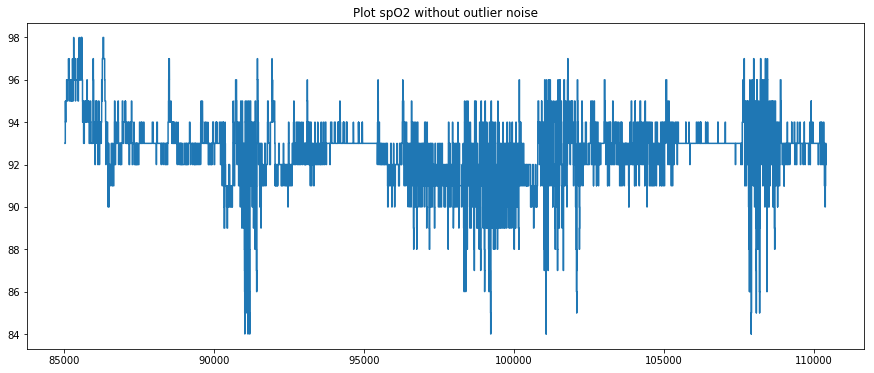

In [315]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2 without outlier noise')
time_array=df_outlier['time']
spo2_array=df_outlier['spO2']
plt.step(time_array,spo2_array)

In [316]:
# Fluctuation noise


### Feature extraction

In [317]:
desaturations=pd.DataFrame()
pstart=[]
pvalley1=[]
pvalley2=[]
pstop=[]
spo2_start=[]
spo2_stop=[]
spo2_start_s=[]
spo2_stop_s=[]
spo2_valley1=[]
plowest=[]
ptraslaction=[]
tdown=[]
tup=[]
tlast=[]
durata=[]
pv1=0
pv2=0

'''somma=0
start_index=[]
stop_index=[]
pv1_index=[]
pv2_index=[]
stop=0'''
for i in range(0,len(spo2_array)):
    somma=somma+spo2_array[i]
xbase=1/len(spo2_array)*somma-10
CASE=0
discesa=False
minimo=100
for i in range(0,len(spo2_array)-2):
    if(CASE==0 and spo2_array[i]>spo2_array[i+1]):
        start_index=i
        minimo=100
        CASE=1
      #  minimo=spo2_array[i+1]
        discesa=True
    if(CASE==1 and spo2_array[i]==spo2_array[i+1]):
        if(discesa==True and spo2_array[i]<minimo):
            pv1=i
            minimo=spo2_array[i]
        discesa=False
    if(CASE==1 and spo2_array[i]>spo2_array[i+1]):
       # pv1=i
        pv2=i
      #  minimo=spo2_array[i+1]
        discesa=True
    if(CASE==1 and spo2_array[i]<spo2_array[i+1]):
        CASE=3
    if(CASE==3 and spo2_array[i]<spo2_array[i+1]):
        stop_index=i
        start_time=df_outlier['time'][start_index]
        valley1_time=df_outlier['time'][pv1]
        stop_time=df_outlier['time'][stop_index]
        spo2Stop=df_outlier['spO2'][stop_index]
        spo2Start=df_outlier['spO2'][start_index]
        d=stop_time-start_time
        if(d>9 and spo2Stop<=spo2Start*0.96):
            spo2_start_s.append(datetime.timedelta(seconds=remove_days(start_time)))
            spo2_stop_s.append(datetime.timedelta(seconds=remove_days(stop_time)))
           # start_time=remove_days(start_time)
          #  stop_time=remove_days(stop_time)
          #  valley1_time=remove_days(valley1_time)
            pstart.append(start_time)
            pstop.append(stop_time)
            spo2_start.append(spo2Start)
            spo2_stop.append(spo2Stop)
            spo2_valley1.append(df_outlier['spO2'][pv1])
            pvalley1.append(valley1_time)
            durata.append(d)
        CASE=0
desaturations['start_time']=pstart[0:len(pstart)]
desaturations['stop_time']=pstop
desaturations['start_time_s']=spo2_start_s[0:len(pstart)]
desaturations['stop_time_s']=spo2_stop_s
desaturations['valley1']=pvalley1  
desaturations['valley1_spO2']=spo2_valley1  
desaturations['start_spO2']=spo2_start[0:len(pstart)]
desaturations['stop_spO2']=spo2_stop  
desaturations['durata (s)']=durata  

In [318]:
desaturations

,start_time,stop_time,start_time_s,stop_time_s,valley1,valley1_spO2,start_spO2,stop_spO2,durata (s)
0,85968.0,85996.0,23:52:48,23:53:16,85989.0,93,97,93,28.0
1,86311.0,86391.0,23:58:31,23:59:51,86386.0,92,98,92,80.0
2,86444.0,86462.0,00:00:44,00:01:02,86459.0,90,94,90,18.0
3,90309.0,90349.0,01:05:09,01:05:49,90325.0,89,94,89,40.0
4,90363.0,90443.0,01:06:03,01:07:23,90429.0,89,94,89,80.0
5,90635.0,90681.0,01:10:35,01:11:21,90667.0,91,95,91,46.0
6,90743.0,90770.0,01:12:23,01:12:50,90760.0,92,96,92,27.0
7,90851.0,90876.0,01:14:11,01:14:36,90868.0,90,94,90,25.0
8,90894.0,90922.0,01:14:54,01:15:22,90920.0,89,95,89,28.0
9,90940.0,90966.0,01:15:40,01:16:06,90965.0,89,95,89,26.0


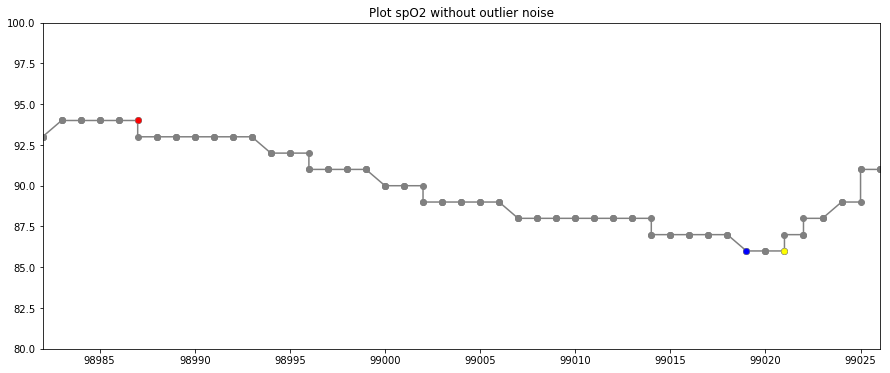

In [320]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2 without outlier noise')
i=50
plt.axis([pstart[i]-5,pstop[i]+5,80,100])
time_array=df_outlier['time']
spo2_array=df_outlier['spO2']
plt.plot(df_outlier['time'],df_outlier['spO2'], marker='o', color="grey")
plt.plot(pstart[i],spo2_start[i],  marker='o', markersize=5, color="red")
plt.plot(pstop[i],spo2_stop[i],  marker='o', markersize=5, color="yellow")
plt.plot(pvalley1[i],spo2_valley1[i],  marker='o', markersize=5, color="blue")
#plt.plot(time_array[pv1_index[5]],spo2_array[pv1_index[5]],  marker='o', markersize=3, color="blue")
#plt.plot(time_array[pv2_index[5]],spo2_array[pv2_index[5]],  marker='o', markersize=3, color="green")

#### 

In [321]:
print(minimo)

92


In [322]:
a=np.array(df.loc[df['time'] == pstop[0]])
a[0]

array([85996.,    93.])

In [323]:
spo2_start

[97,
 98,
 94,
 94,
 94,
 95,
 96,
 94,
 95,
 95,
 93,
 95,
 95,
 95,
 95,
 94,
 94,
 94,
 95,
 97,
 93,
 95,
 96,
 96,
 95,
 95,
 94,
 94,
 94,
 94,
 94,
 93,
 92,
 94,
 94,
 94,
 93,
 95,
 95,
 95,
 94,
 94,
 93,
 95,
 95,
 93,
 92,
 94,
 95,
 94,
 94,
 95,
 94,
 93,
 94,
 95,
 94,
 94,
 94,
 92,
 95,
 94,
 93,
 94,
 93,
 93,
 94,
 93,
 94,
 93,
 94,
 93,
 93,
 93,
 96,
 95,
 94,
 96,
 96,
 96,
 96,
 95,
 95,
 92,
 95,
 96,
 96,
 95,
 92,
 96,
 95,
 97,
 95,
 95,
 96,
 93,
 95,
 95,
 96,
 95,
 94,
 97,
 95,
 95,
 96,
 96,
 97,
 95,
 96,
 95,
 97,
 96,
 96,
 97,
 97,
 95,
 95,
 95,
 95,
 94,
 96,
 94]

In [324]:
pvalley1[90]

101760.0

In [325]:
pstart[90]

101730.0